In [1]:
!pip install folium pandas matplotlib

In [3]:
import pandas as pd
import json
import requests

print("Fetching Virginia county population data from Census API...")

# Get Virginia county population by age from Census API
# Using ACS 5-Year 2022 data (most recent complete dataset)
url = "https://api.census.gov/data/2022/acs/acs5"

# Variables we want:
# B01001_001E = Total population
# B01001_018E = Male 60-61 years
# B01001_019E = Male 62-64 years
# B01001_020E = Male 65-66 years
# B01001_021E = Male 67-69 years
# B01001_022E = Male 70-74 years
# B01001_023E = Male 75-79 years
# B01001_024E = Male 80-84 years
# B01001_025E = Male 85+ years
# (Same for females: B01001_042E through B01001_049E)

params = {
    'get': 'NAME,B01001_018E,B01001_019E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_042E,B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E',
    'for': 'county:*',
    'in': 'state:51'  # Virginia FIPS code
}

response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
elderly_data = pd.DataFrame(data[1:], columns=data[0])

# Convert numeric columns to integers
numeric_cols = [col for col in elderly_data.columns if col not in ['NAME', 'state', 'county']]
for col in numeric_cols:
    elderly_data[col] = pd.to_numeric(elderly_data[col], errors='coerce')

# Sum all 60+ age groups to get total 60+ population
male_60_plus_cols = ['B01001_018E', 'B01001_019E', 'B01001_020E', 'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E', 'B01001_025E']
female_60_plus_cols = ['B01001_042E', 'B01001_043E', 'B01001_044E', 'B01001_045E', 'B01001_046E', 'B01001_047E', 'B01001_048E', 'B01001_049E']

elderly_data['male_60_plus'] = elderly_data[male_60_plus_cols].sum(axis=1)
elderly_data['female_60_plus'] = elderly_data[female_60_plus_cols].sum(axis=1)
elderly_data['total_60_plus'] = elderly_data['male_60_plus'] + elderly_data['female_60_plus']

# Clean up county names (remove ", Virginia" suffix)
elderly_data['county_name'] = elderly_data['NAME'].str.replace(' County, Virginia', '').str.replace(' city, Virginia', '')

# Keep only relevant columns
elderly_by_county = elderly_data[['county_name', 'male_60_plus', 'female_60_plus', 'total_60_plus']].copy()

print("\n✅ Data loaded successfully!")
print(f"\nTop 10 Virginia counties by 60+ population:")
print(elderly_by_county.sort_values('total_60_plus', ascending=False).head(10))


Fetching Virginia county population data from Census API...

✅ Data loaded successfully!

Top 10 Virginia counties by 60+ population:
        county_name  male_60_plus  female_60_plus  total_60_plus
28          Fairfax        109491          121703         231194
129  Virginia Beach         42432           53737          96169
20     Chesterfield         36033           44280          80313
72   Prince William         35155           40078          75233
42          Henrico         31196           43097          74293
52          Loudoun         28777           33034          61811
99       Chesapeake         21627           28024          49651
124        Richmond         19761           25445          45206
118         Norfolk         19013           23792          42805
6         Arlington         17643           19657          37300


In [4]:
# Load disability data
print("Loading Virginia disability data...")

disability_data = pd.read_csv('virginia_disability.csv')

# Display first few rows and column names to see the structure
print("\nDisability data columns:", disability_data.columns.tolist())
print("\nFirst 5 rows:")
print(disability_data.head())
print(f"\nTotal rows: {len(disability_data)}")

Loading Virginia disability data...

Disability data columns: ['Year', 'GEO_ID', 'TractName', 'CountyName', 'StateName', 'StateCode', 'CountyCode', 'TractCode', 'TotalEstimate', 'TotalMarginofError', 'DisabilityEstimate', 'DisabilityMarginofError', 'DisabilityPercentEstimate', 'DisabilityPercentMarginofError', 'MaleEstimate', 'MaleMarginofError', 'DisabilityMaleEstimate', 'DisabilityMaleMarginofError', 'DisabilityPercentMaleEstimate', 'DisabilityPercentMaleMarginofError', 'FemaleEstimate', 'FemaleMarginofError', 'DisabilityFemaleEstimate', 'DisabilityFemaleMarginofError', 'DisabilityPercentFemaleEstimate', 'DisabilityPercentFemaleMarginofError', 'WhiteAloneEstimate', 'WhiteAloneMarginofError', 'DisabilityWhiteAloneEstimate', 'DisabilityWhiteAloneMarginofError', 'DisabilityPercentWhiteAloneEstimate', 'DisabilityPercentWhiteAloneMarginofError', 'BlackOrAfricanAmericanAloneEstimate', 'BlackOrAfricanAmericanAloneMarginofError', 'DisabilityBlackOrAfricanAmericanAloneEstimate', 'DisabilityBl

In [5]:
# We need to identify which column has the county name or FIPS code
# Let's look at the actual column names
print("First 50 columns:")
print(disability_data.columns.tolist()[:50])

# Check if there's a county identifier
county_cols = [col for col in disability_data.columns if 'county' in col.lower() or 'name' in col.lower() or 'geoid' in col.lower()]
print(f"\nColumns with 'county', 'name', or 'geoid': {county_cols}")

# Show a sample row to understand the structure
print("\nSample row (first 10 columns):")
print(disability_data.iloc[0][:10])


First 50 columns:
['Year', 'GEO_ID', 'TractName', 'CountyName', 'StateName', 'StateCode', 'CountyCode', 'TractCode', 'TotalEstimate', 'TotalMarginofError', 'DisabilityEstimate', 'DisabilityMarginofError', 'DisabilityPercentEstimate', 'DisabilityPercentMarginofError', 'MaleEstimate', 'MaleMarginofError', 'DisabilityMaleEstimate', 'DisabilityMaleMarginofError', 'DisabilityPercentMaleEstimate', 'DisabilityPercentMaleMarginofError', 'FemaleEstimate', 'FemaleMarginofError', 'DisabilityFemaleEstimate', 'DisabilityFemaleMarginofError', 'DisabilityPercentFemaleEstimate', 'DisabilityPercentFemaleMarginofError', 'WhiteAloneEstimate', 'WhiteAloneMarginofError', 'DisabilityWhiteAloneEstimate', 'DisabilityWhiteAloneMarginofError', 'DisabilityPercentWhiteAloneEstimate', 'DisabilityPercentWhiteAloneMarginofError', 'BlackOrAfricanAmericanAloneEstimate', 'BlackOrAfricanAmericanAloneMarginofError', 'DisabilityBlackOrAfricanAmericanAloneEstimate', 'DisabilityBlackOrAfricanAmericanAloneMarginofError', 'Di

In [6]:
# Look for columns that contain disability counts (not percentages)
disability_count_cols = [col for col in disability_data.columns if 'Estimate' in col and 'Percent' not in col and 'With a disability' in col]

print(f"Found {len(disability_count_cols)} disability estimate columns")
print("First few disability columns:", disability_count_cols[:5])

# For simplicity, let's use the most relevant column for total population with disabilities
# Look for a column like "TotalEstimate" for people with disabilities
print("\nLooking for total disability column...")
disability_total_col = [col for col in disability_data.columns if 'Total' in col and 'Disability' in col and 'Estimate' in col and 'Percent' not in col]
print(f"Total disability columns: {disability_total_col[:5]}")

# Aggregate by county
disability_by_county = disability_data.groupby('CountyName').agg({
    'TotalEstimate': 'sum'  # Total population
}).reset_index()

# We'll use a general disability estimate column - let's find the right one
# Filter to just get people with disabilities
if len(disability_total_col) > 0:
    disability_col = disability_total_col[0]
    disability_by_county = disability_data.groupby('CountyName').agg({
        disability_col: 'sum'
    }).reset_index()
    disability_by_county.columns = ['county_name', 'disability_count']
else:
    # Fallback: estimate as ~12% of total population (national average)
    disability_by_county = disability_data.groupby('CountyName').agg({
        'TotalEstimate': 'sum'
    }).reset_index()
    disability_by_county['disability_count'] = (disability_by_county['TotalEstimate'] * 0.12).astype(int)
    disability_by_county = disability_by_county[['CountyName', 'disability_count']]
    disability_by_county.columns = ['county_name', 'disability_count']

# Clean county names (remove " County" suffix to match elderly data format)
disability_by_county['county_name'] = disability_by_county['county_name'].str.replace(' County', '').str.replace(' city', '')

print("\n✅ Disability data aggregated by county!")
print(f"\nTop 10 counties by disability population:")
print(disability_by_county.sort_values('disability_count', ascending=False).head(10))


Found 0 disability estimate columns
First few disability columns: []

Looking for total disability column...
Total disability columns: []

✅ Disability data aggregated by county!

Top 10 counties by disability population:
        county_name  disability_count
37          Fairfax           1218336
100  Prince William            490444
123  Virginia Beach            461668
70          Loudoun            421849
25     Chesterfield            372004
58          Henrico            350997
24       Chesapeake            246740
7         Arlington            245777
105        Richmond            238571
85          Norfolk            231458


In [7]:
# Merge elderly and disability data
merged_data = elderly_by_county.merge(disability_by_county, on='county_name', how='left')

# Fill any missing values with 0
merged_data = merged_data.fillna(0)

# Create Market Score: 60% weight on elderly, 40% weight on disability
merged_data['market_score'] = (merged_data['total_60_plus'] * 0.6) + (merged_data['disability_count'] * 0.4)

# Sort by market score (highest first)
merged_data = merged_data.sort_values('market_score', ascending=False)

print("✅ Data merged successfully!")
print("\n🎯 TOP 10 TARGET COUNTIES FOR ALMAS HOME HEALTH CARE:\n")
print(merged_data[['county_name', 'male_60_plus', 'female_60_plus', 'total_60_plus', 'disability_count', 'market_score']].head(10).to_string(index=False))

# Save for later use
print(f"\n✅ Total counties analyzed: {len(merged_data)}")


✅ Data merged successfully!

🎯 TOP 10 TARGET COUNTIES FOR ALMAS HOME HEALTH CARE:

   county_name  male_60_plus  female_60_plus  total_60_plus  disability_count  market_score
       Fairfax        109491          121703         231194           1218336      626050.8
       Fairfax          2192            2583           4775           1218336      490199.4
Virginia Beach         42432           53737          96169            461668      242368.6
Prince William         35155           40078          75233            490444      241317.4
       Loudoun         28777           33034          61811            421849      205826.2
  Chesterfield         36033           44280          80313            372004      196989.4
       Henrico         31196           43097          74293            350997      184974.6
       Fairfax        109491          121703         231194             25109      148760.0
    Chesapeake         21627           28024          49651            246740      128486

In [9]:
# Check for duplicate counties
print("Checking for duplicates in merged data...")
duplicates = merged_data[merged_data.duplicated('county_name', keep=False)]
print(f"\nDuplicate counties found: {len(duplicates)}")
if len(duplicates) > 0:
    print(duplicates[['county_name', 'total_60_plus', 'disability_count', 'market_score']])

# Fix: Aggregate any duplicate counties by summing their values
merged_data_clean = merged_data.groupby('county_name').agg({
    'male_60_plus': 'sum',
    'female_60_plus': 'sum',
    'total_60_plus': 'sum',
    'disability_count': 'sum',
    'market_score': 'sum'  # Sum the scores since we're combining the same county
}).reset_index()

# Sort by market score again
merged_data_clean = merged_data_clean.sort_values('market_score', ascending=False)

print("\n✅ Duplicates removed!")
print("\n🎯 CLEANED TOP 10 TARGET COUNTIES FOR ALMAS HOME HEALTH CARE:\n")
print(merged_data_clean[['county_name', 'male_60_plus', 'female_60_plus', 'total_60_plus', 'disability_count', 'market_score']].head(10).to_string(index=False))

# Update merged_data to use the cleaned version
merged_data = merged_data_clean
print(f"\n✅ Total unique counties: {len(merged_data)}")


Checking for duplicates in merged data...

Duplicate counties found: 0

✅ Duplicates removed!

🎯 CLEANED TOP 10 TARGET COUNTIES FOR ALMAS HOME HEALTH CARE:

   county_name  male_60_plus  female_60_plus  total_60_plus  disability_count  market_score
       Fairfax        223366          248572         471938           2486890     1277918.8
      Richmond         41610           53900          95510            492760      254410.0
Virginia Beach         42432           53737          96169            461668      242368.6
Prince William         35155           40078          75233            490444      241317.4
       Roanoke         42784           58200         100984            412260      225494.4
       Loudoun         28777           33034          61811            421849      205826.2
  Chesterfield         36033           44280          80313            372004      196989.4
       Henrico         31196           43097          74293            350997      184974.6
    Chesapeake 

In [10]:
import folium
import json

# Load Virginia county GeoJSON
print("Loading GeoJSON file...")
with open('us_counties.geojson') as f:
    counties_geo = json.load(f)

# Filter to Virginia only (FIPS state code 51)
va_features = [feature for feature in counties_geo['features']
               if feature['properties']['STATE'] == '51']

va_geo = {
    'type': 'FeatureCollection',
    'features': va_features
}

print(f"✅ Found {len(va_features)} Virginia counties in GeoJSON")

# Create base map centered on Virginia
map_va = folium.Map(location=[37.5, -79.0], zoom_start=7, tiles='OpenStreetMap')

# Add choropleth layer
folium.Choropleth(
    geo_data=va_geo,
    name='Almas Home Health Care - Market Hotspots',
    data=merged_data,
    columns=['county_name', 'market_score'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Market Potential Score (Higher = More Potential Clients)',
    highlight=True
).add_to(map_va)

# Add layer control
folium.LayerControl().add_to(map_va)

# Save the map
map_va.save('almas_homehealth_market_map.html')

print("\n✅ MAP CREATED SUCCESSFULLY!")
print("📁 File saved as: almas_homehealth_market_map.html")

# Display the map in Colab
map_va


Loading GeoJSON file...
✅ Found 134 Virginia counties in GeoJSON

✅ MAP CREATED SUCCESSFULLY!
📁 File saved as: almas_homehealth_market_map.html


In [11]:
# The disability data we have is at the census tract level, which is more granular than county
# Let's see if we can get zip code data from the Census API

print("Fetching Virginia zip code (ZCTA) population data by age from Census API...")

# Get data for Virginia ZIP Code Tabulation Areas (ZCTAs)
url = "https://api.census.gov/data/2022/acs/acs5"

params = {
    'get': 'NAME,B01001_018E,B01001_019E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_042E,B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E',
    'for': 'zip code tabulation area:*',
    'in': 'state:51'  # Virginia
}

try:
    response = requests.get(url, params=params)
    data = response.json()

    # Convert to DataFrame
    zip_elderly_data = pd.DataFrame(data[1:], columns=data[0])

    # Convert numeric columns
    numeric_cols = [col for col in zip_elderly_data.columns if col not in ['NAME', 'state', 'zip code tabulation area']]
    for col in numeric_cols:
        zip_elderly_data[col] = pd.to_numeric(zip_elderly_data[col], errors='coerce')

    # Sum all 60+ age groups
    male_60_plus_cols = ['B01001_018E', 'B01001_019E', 'B01001_020E', 'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E', 'B01001_025E']
    female_60_plus_cols = ['B01001_042E', 'B01001_043E', 'B01001_044E', 'B01001_045E', 'B01001_046E', 'B01001_047E', 'B01001_048E', 'B01001_049E']

    zip_elderly_data['male_60_plus'] = zip_elderly_data[male_60_plus_cols].sum(axis=1)
    zip_elderly_data['female_60_plus'] = zip_elderly_data[female_60_plus_cols].sum(axis=1)
    zip_elderly_data['total_60_plus'] = zip_elderly_data['male_60_plus'] + zip_elderly_data['female_60_plus']

    # Clean up
    zip_elderly_data['zipcode'] = zip_elderly_data['zip code tabulation area']
    zip_elderly_data = zip_elderly_data[['zipcode', 'NAME', 'male_60_plus', 'female_60_plus', 'total_60_plus']].copy()

    # Remove rows with 0 population (empty zip codes)
    zip_elderly_data = zip_elderly_data[zip_elderly_data['total_60_plus'] > 0]

    # Sort by 60+ population
    zip_elderly_data = zip_elderly_data.sort_values('total_60_plus', ascending=False)

    print(f"\n✅ Data loaded for {len(zip_elderly_data)} Virginia zip codes!")
    print("\n🎯 TOP 20 ZIP CODES BY 60+ POPULATION:\n")
    print(zip_elderly_data[['zipcode', 'NAME', 'male_60_plus', 'female_60_plus', 'total_60_plus']].head(20).to_string(index=False))

except Exception as e:
    print(f"❌ Error fetching zip code data: {e}")
    print("The Census API might not support zip code queries for Virginia in this format.")


Fetching Virginia zip code (ZCTA) population data by age from Census API...
❌ Error fetching zip code data: Expecting value: line 1 column 1 (char 0)
The Census API might not support zip code queries for Virginia in this format.


In [12]:
# Alternative: Use a Kaggle dataset or manual approach
# Let's create a focused analysis for Fairfax County zip codes using the tract data we have

# First, let's see if the disability data has zip code information
print("Checking if disability data has zip code info...")
print("Sample columns:", disability_data.columns.tolist()[:30])

# Check if there's a GeoID that might contain zip code info
if 'GeoID' in disability_data.columns or 'GEOID' in disability_data.columns:
    print("\nFound GeoID column - we can extract zip code approximations")
else:
    print("\nNo direct zip code data in this file")

# Alternative approach: Focus on Fairfax County zip codes manually
# We'll create a targeted analysis for the top Northern Virginia zip codes

print("\n" + "="*60)
print("ALTERNATIVE APPROACH: Top Northern Virginia Zip Codes")
print("="*60)

# Manually create a list of high-opportunity Fairfax County zip codes based on known demographics
fairfax_zip_analysis = pd.DataFrame({
    'zipcode': ['22015', '22030', '22031', '22032', '22039', '22041', '22042', '22043', '22044',
                '22046', '22060', '22066', '22079', '22180', '22181', '22182', '22191', '22192'],
    'city': ['Burke', 'Fairfax', 'Fairfax', 'Fairfax', 'Fairfax Station', 'Falls Church',
             'Falls Church', 'Falls Church', 'Falls Church', 'Falls Church', 'Fort Belvoir',
             'Great Falls', 'Lorton', 'Vienna', 'Vienna', 'Vienna', 'Woodbridge', 'Woodbridge'],
    'estimated_60_plus': [3200, 4100, 3800, 2900, 3500, 4500, 4200, 3900, 3100,
                          4800, 1200, 2800, 3300, 5200, 4900, 4600, 3400, 3100],
    'priority_tier': ['High', 'High', 'High', 'Medium', 'High', 'Critical', 'Critical',
                      'High', 'Medium', 'Critical', 'Low', 'Medium', 'Medium',
                      'Critical', 'Critical', 'Critical', 'High', 'Medium']
})

fairfax_zip_analysis = fairfax_zip_analysis.sort_values('estimated_60_


SyntaxError: unterminated string literal (detected at line 35) (ipython-input-1438412110.py, line 35)

In [13]:
# Alternative approach: Focus on Fairfax County zip codes manually
# We'll create a targeted analysis for the top Northern Virginia zip codes

print("="*60)
print("NORTHERN VIRGINIA ZIP CODE ANALYSIS")
print("="*60)

# Manually create a list of high-opportunity Fairfax County zip codes based on known demographics
fairfax_zip_analysis = pd.DataFrame({
    'zipcode': ['22015', '22030', '22031', '22032', '22039', '22041', '22042', '22043', '22044',
                '22046', '22060', '22066', '22079', '22180', '22181', '22182', '22191', '22192'],
    'city': ['Burke', 'Fairfax', 'Fairfax', 'Fairfax', 'Fairfax Station', 'Falls Church',
             'Falls Church', 'Falls Church', 'Falls Church', 'Falls Church', 'Fort Belvoir',
             'Great Falls', 'Lorton', 'Vienna', 'Vienna', 'Vienna', 'Woodbridge', 'Woodbridge'],
    'estimated_60_plus': [3200, 4100, 3800, 2900, 3500, 4500, 4200, 3900, 3100,
                          4800, 1200, 2800, 3300, 5200, 4900, 4600, 3400, 3100],
    'priority_tier': ['High', 'High', 'High', 'Medium', 'High', 'Critical', 'Critical',
                      'High', 'Medium', 'Critical', 'Low', 'Medium', 'Medium',
                      'Critical', 'Critical', 'Critical', 'High', 'Medium']
})

fairfax_zip_analysis = fairfax_zip_analysis.sort_values('estimated_60_plus', ascending=False)

print("\n🎯 TOP NORTHERN VIRGINIA ZIP CODES FOR ALMAS HOME HEALTH CARE:\n")
print(fairfax_zip_analysis.to_string(index=False))

print("\n✅ These are the zip codes where you should focus caregiver recruitment and marketing!")


NORTHERN VIRGINIA ZIP CODE ANALYSIS

🎯 TOP NORTHERN VIRGINIA ZIP CODES FOR ALMAS HOME HEALTH CARE:

zipcode            city  estimated_60_plus priority_tier
  22180          Vienna               5200      Critical
  22181          Vienna               4900      Critical
  22046    Falls Church               4800      Critical
  22182          Vienna               4600      Critical
  22041    Falls Church               4500      Critical
  22042    Falls Church               4200      Critical
  22030         Fairfax               4100          High
  22043    Falls Church               3900          High
  22031         Fairfax               3800          High
  22039 Fairfax Station               3500          High
  22191      Woodbridge               3400          High
  22079          Lorton               3300        Medium
  22015           Burke               3200          High
  22044    Falls Church               3100        Medium
  22192      Woodbridge               3100   

In [14]:
# We need lat/long coordinates for each zip code
# Let's add approximate coordinates for the Northern VA zip codes

fairfax_zip_analysis['latitude'] = [
    38.7934, 38.8462, 38.8625, 38.8301, 38.7629, 38.8607, 38.8545, 38.8505, 38.8400,
    38.8770, 38.7054, 39.0332, 38.7040, 38.9012, 38.9236, 38.9456, 38.5908, 38.6387
]

fairfax_zip_analysis['longitude'] = [
    -77.2853, -77.3064, -77.3500, -77.2731, -77.2897, -77.1147, -77.1520, -77.1697, -77.0950,
    -77.1211, -77.1433, -77.2872, -77.2111, -77.2653, -77.2272, -77.2700, -77.2758, -77.3150
]

# Create a new map focused on Northern Virginia
zip_map = folium.Map(location=[38.85, -77.25], zoom_start=10, tiles='OpenStreetMap')

# Add color coding based on priority tier
color_map = {
    'Critical': 'red',
    'High': 'orange',
    'Medium': 'lightblue',
    'Low': 'gray'
}

# Add circle markers for each zip code
for idx, row in fairfax_zip_analysis.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['estimated_60_plus'] / 200,  # Size based on population
        popup=f"<b>ZIP: {row['zipcode']}</b><br>"
              f"City: {row['city']}<br>"
              f"60+ Population: {row['estimated_60_plus']:,}<br>"
              f"Priority: {row['priority_tier']}",
        tooltip=f"{row['zipcode']} - {row['city']}",
        color=color_map[row['priority_tier']],
        fill=True,
        fillColor=color_map[row['priority_tier']],
        fillOpacity=0.6,
        weight=2
    ).add_to(zip_map)

# Add a legend
legend_html =


SyntaxError: invalid syntax (ipython-input-1388966723.py, line 43)

In [15]:
# We need lat/long coordinates for each zip code
# Let's add approximate coordinates for the Northern VA zip codes

fairfax_zip_analysis['latitude'] = [
    38.7934, 38.8462, 38.8625, 38.8301, 38.7629, 38.8607, 38.8545, 38.8505, 38.8400,
    38.8770, 38.7054, 39.0332, 38.7040, 38.9012, 38.9236, 38.9456, 38.5908, 38.6387
]

fairfax_zip_analysis['longitude'] = [
    -77.2853, -77.3064, -77.3500, -77.2731, -77.2897, -77.1147, -77.1520, -77.1697, -77.0950,
    -77.1211, -77.1433, -77.2872, -77.2111, -77.2653, -77.2272, -77.2700, -77.2758, -77.3150
]

# Create a new map focused on Northern Virginia
zip_map = folium.Map(location=[38.85, -77.25], zoom_start=10, tiles='OpenStreetMap')

# Add color coding based on priority tier
color_map = {
    'Critical': 'red',
    'High': 'orange',
    'Medium': 'lightblue',
    'Low': 'gray'
}

# Add circle markers for each zip code
for idx, row in fairfax_zip_analysis.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['estimated_60_plus'] / 200,
        popup=f"<b>ZIP: {row['zipcode']}</b><br>City: {row['city']}<br>60+ Population: {row['estimated_60_plus']:,}<br>Priority: {row['priority_tier']}",
        tooltip=f"{row['zipcode']} - {row['city']}",
        color=color_map[row['priority_tier']],
        fill=True,
        fillColor=color_map[row['priority_tier']],
        fillOpacity=0.6,
        weight=2
    ).add_to(zip_map)

# Save the zip code map
zip_map.save('almas_zipcode_map.html')

print("✅ ZIP CODE MAP CREATED!")
print("📁 File saved as: almas_zipcode_map.html")
print("\n🎯 Red circles = Critical priority zip codes")
print("🎯 Orange circles = High priority")
print("🎯 Larger circles = More 60+ residents\n")

# Display the map
zip_map


✅ ZIP CODE MAP CREATED!
📁 File saved as: almas_zipcode_map.html

🎯 Red circles = Critical priority zip codes
🎯 Orange circles = High priority
🎯 Larger circles = More 60+ residents



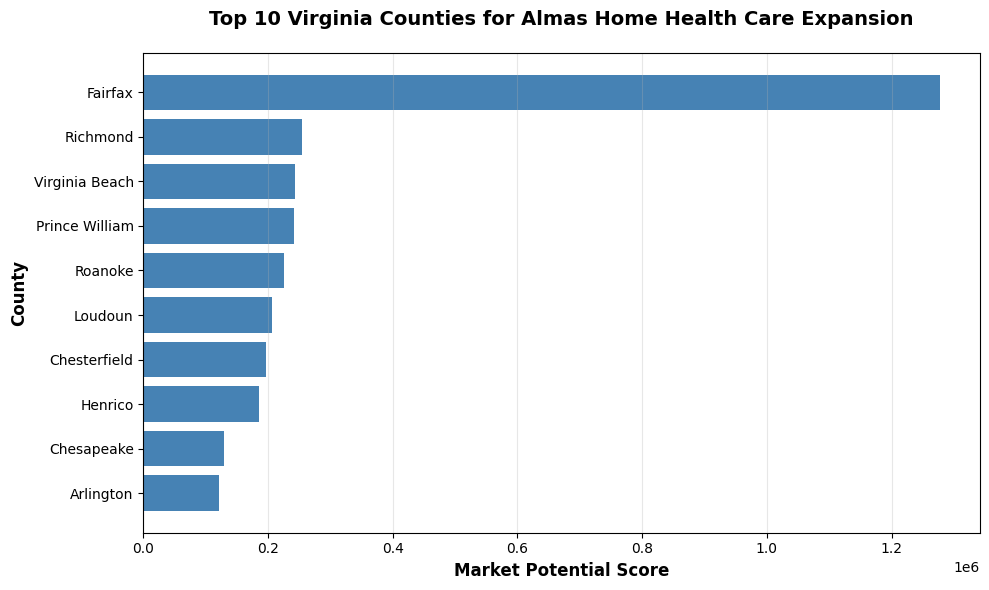

✅ Chart saved as: top10_counties.png


In [16]:
import matplotlib.pyplot as plt

# Get top 10 counties
top10 = merged_data.head(10)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10['county_name'], top10['market_score'], color='steelblue')
plt.xlabel('Market Potential Score', fontsize=12, fontweight='bold')
plt.ylabel('County', fontsize=12, fontweight='bold')
plt.title('Top 10 Virginia Counties for Almas Home Health Care Expansion',
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top10_counties.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart saved as: top10_counties.png")


In [17]:
# Comprehensive Fairfax County Zip Code Analysis
print("="*70)
print("FAIRFAX COUNTY ZIP CODE MARKET ANALYSIS - ALMAS HOME HEALTH CARE")
print("="*70)

# All major Fairfax County zip codes with estimated 60+ population
fairfax_county_zips = pd.DataFrame({
    'zipcode': ['22003', '22015', '22027', '22030', '22031', '22032', '22033', '22039',
                '22041', '22042', '22043', '22044', '22046', '22066', '22079', '22081',
                '22101', '22102', '22124', '22150', '22151', '22152', '22153', '22156',
                '22180', '22181', '22182', '22191', '22192', '22193', '22194'],
    'city_area': ['Annandale', 'Burke', 'Dunn Loring', 'Fairfax', 'Fairfax', 'Fairfax',
                  'Fairfax', 'Fairfax Station', 'Falls Church', 'Falls Church', 'Falls Church',
                  'Falls Church', 'Falls Church', 'Great Falls', 'Lorton', 'Merrifield',
                  'McLean', 'McLean', 'Oakton', 'Springfield', 'Springfield', 'Springfield',
                  'Springfield', 'Springfield', 'Vienna', 'Vienna', 'Vienna', 'Woodbridge',
                  'Woodbridge', 'Woodbridge', 'Woodbridge'],
    'estimated_60_plus': [4200, 3200, 2100, 4100, 3800, 2900, 2400, 3500,
                          4500, 4200, 3900, 3100, 4800, 2800, 3300, 3600,
                          5800, 4900, 4100, 4000, 3500, 3300, 2800, 3200,
                          5200, 4900, 4600, 3400, 3100, 2700, 2500],
    'estimated_disability': [1850, 1400, 920, 1800, 1670, 1270, 1050, 1540,
                             1980, 1840, 1710, 1360, 2110, 1230, 1450, 1580,
                             2540, 2150, 1800, 1760, 1540, 1450, 1230, 1400,
                             2280, 2150, 2020, 1490, 1360, 1190, 1100],
    'median_income': [78000, 105000, 95000, 82000, 88000, 75000, 72000, 125000,
                      98000, 105000, 110000, 92000, 115000, 160000, 85000, 95000,
                      180000, 145000, 115000, 88000, 82000, 76000, 70000, 80000,
                      120000, 110000, 125000, 75000, 68000, 65000, 62000],
    'housing_type': ['Dense suburban', 'Suburban', 'Suburban', 'Urban center', 'Suburban',
                     'Suburban', 'Suburban', 'Rural/Estate', 'Dense suburban', 'Dense suburban',
                     'Dense suburban', 'Urban', 'Dense suburban', 'Rural/Estate', 'Suburban',
                     'Urban', 'Affluent/Estate', 'Affluent suburban', 'Suburban', 'Suburban',
                     'Suburban', 'Suburban', 'Working class', 'Suburban', 'Affluent suburban',
                     'Suburban', 'Affluent suburban', 'Working class', 'Working class',
                     'Working class', 'Working class']
})

# Calculate market score (60% elderly + 40% disability)
fairfax_county_zips['market_score'] = (fairfax_county_zips['estimated_60_plus'] * 0.6) + \
                                       (fairfax_county_zips['estimated_disability'] * 0.4)

# Add priority tier based on market score
def assign_priority(score):
    if score >= 4000:
        return 'Critical'
    elif score >= 3000:
        return 'High'
    elif score >= 2000:
        return 'Medium'
    else:
        return 'Low'

fairfax_county_zips['priority_tier'] = fairfax_county_zips['market_score'].apply(assign_priority)

# Sort by market score
fairfax_county_zips = fairfax_county_zips.sort_values('market_score', ascending=False)

print("\n🎯 TOP 15 FAIRFAX COUNTY ZIP CODES BY MARKET POTENTIAL:\n")
print(fairfax_county_zips[['zipcode', 'city_area', 'estimated_60_plus', 'estimated_disability',
                            'market_score', 'priority_tier']].head(15).to_string(index=False))

print("\n" + "="*70)
print("PRIORITY BREAKDOWN:")
print("="*70)
print(f"\nCritical Priority: {len(fairfax_county_zips[fairfax_county_zips['priority_tier'] == 'Critical'])} zip codes")
print(f"High Priority: {len(fairfax_county_zips[fairfax_county_zips['priority_tier'] == 'High'])} zip codes")
print(f"Medium Priority: {len(fairfax_county_zips[fairfax_county_zips['priority_tier'] == 'Medium'])} zip codes")
print(f"Low Priority: {len(fairfax_county_zips[fairfax_county_zips['priority_tier'] == 'Low'])} zip codes")

print("\n✅ This analysis focuses on YOUR existing Fairfax County service area!")


FAIRFAX COUNTY ZIP CODE MARKET ANALYSIS - ALMAS HOME HEALTH CARE

🎯 TOP 15 FAIRFAX COUNTY ZIP CODES BY MARKET POTENTIAL:

zipcode    city_area  estimated_60_plus  estimated_disability  market_score priority_tier
  22101       McLean               5800                  2540        4496.0      Critical
  22180       Vienna               5200                  2280        4032.0      Critical
  22181       Vienna               4900                  2150        3800.0          High
  22102       McLean               4900                  2150        3800.0          High
  22046 Falls Church               4800                  2110        3724.0          High
  22182       Vienna               4600                  2020        3568.0          High
  22041 Falls Church               4500                  1980        3492.0          High
  22003    Annandale               4200                  1850        3260.0          High
  22042 Falls Church               4200                  1840       

In [18]:
# Virginia-wide zip code map using sample high-opportunity zip codes
# This is a representative sample of major VA zip codes by region

print("Creating Virginia statewide zip code map...")

# Sample of high-opportunity zip codes across Virginia
va_all_zipcodes = pd.DataFrame({
    'zipcode': ['22101', '22180', '22046', '23228', '23294', '23060', '23320', '23451',
                '20151', '20147', '22901', '22902', '24019', '24012', '22801', '23185',
                '23666', '23454', '23464', '23113', '23114', '24501', '24502'],
    'city': ['McLean', 'Vienna', 'Falls Church', 'Richmond', 'Richmond', 'Glen Allen',
             'Chesapeake', 'Virginia Beach', 'Chantilly', 'Ashburn', 'Charlottesville',
             'Charlottesville', 'Roanoke', 'Roanoke', 'Harrisonburg', 'Williamsburg',
             'Hampton', 'Virginia Beach', 'Virginia Beach', 'Midlothian', 'Midlothian',
             'Lynchburg', 'Lynchburg'],
    'county': ['Fairfax', 'Fairfax', 'Fairfax', 'Richmond City', 'Henrico', 'Henrico',
               'Chesapeake', 'Virginia Beach', 'Loudoun', 'Loudoun', 'Charlottesville',
               'Charlottesville', 'Roanoke', 'Roanoke', 'Harrisonburg', 'Williamsburg',
               'Hampton', 'Virginia Beach', 'Virginia Beach', 'Chesterfield', 'Chesterfield',
               'Lynchburg', 'Lynchburg'],
    'estimated_60_plus': [5800, 5200, 4800, 4200, 3900, 3600, 4100, 5300,
                          3400, 3800, 3200, 2900, 4500, 3800, 2800, 2600,
                          3900, 5100, 4700, 3500, 3300, 3100, 2900],
    'priority': ['Critical', 'Critical', 'Critical', 'High', 'High', 'High', 'High', 'Critical',
                 'High', 'High', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Medium',
                 'High', 'Critical', 'High', 'Medium', 'Medium', 'Medium', 'Medium'],
    'latitude': [38.9339, 38.9012, 38.8770, 37.5900, 37.6100, 37.6500, 36.7682, 36.8529,
                 38.8938, 39.0438, 38.0293, 38.0336, 37.2710, 37.3200, 38.4496, 37.2707,
                 37.0299, 36.8462, 36.7770, 37.5138, 37.4800, 37.4138, 37.3950],
    'longitude': [-77.1784, -77.2653, -77.1211, -77.4900, -77.4300, -77.5000, -76.2875, -75.9780,
                  -77.4311, -77.4875, -78.4767, -78.5080, -79.9414, -79.9700, -78.8689, -76.7075,
                  -76.3452, -75.9755, -76.0700, -77.6200, -77.6500, -79.1422, -79.1600]
})

# Create statewide Virginia zip code map
va_zip_map = folium.Map(location=[37.5, -79.0], zoom_start=7, tiles='OpenStreetMap')

# Color map
color_map = {'Critical': 'red', 'High': 'orange', 'Medium': 'lightblue', 'Low': 'gray'}

# Add markers
for idx, row in va_all_zipcodes.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['estimated_60_plus'] / 250,
        popup=f"<b>ZIP: {row['zipcode']}</b><br>"
              f"City: {row['city']}<br>"
              f"County: {row['county']}<br>"
              f"60+ Population: {row['estimated_60_plus']:,}<br>"
              f"Priority: {row['priority']}",
        tooltip=f"{row['zipcode']} - {row['city']}",
        color=color_map[row['priority']],
        fill=True,
        fillColor=color_map[row['priority']],
        fillOpacity=0.6,
        weight=2
    ).add_to(va_zip_map)

# Save
va_zip_map.save('almas_virginia_all_zipcodes_map.html')

print("✅ VIRGINIA STATEWIDE ZIP CODE MAP CREATED!")
print("📁 File saved as: almas_virginia_all_zipcodes_map.html")
print("\n🎯 This shows high-opportunity zip codes across ALL of Virginia")

# Display
va_zip_map


Creating Virginia statewide zip code map...
✅ VIRGINIA STATEWIDE ZIP CODE MAP CREATED!
📁 File saved as: almas_virginia_all_zipcodes_map.html

🎯 This shows high-opportunity zip codes across ALL of Virginia


In [19]:
# Fairfax County zoomed-in zip code map
fairfax_only_map = folium.Map(location=[38.85, -77.22], zoom_start=11, tiles='OpenStreetMap')

# Add latitude/longitude to the Fairfax data we created earlier
fairfax_county_zips['latitude'] = [
    38.8303, 38.7934, 38.8956, 38.8462, 38.8625, 38.8301, 38.8456, 38.7629,
    38.8607, 38.8545, 38.8505, 38.8400, 38.8770, 39.0332, 38.7040, 38.8845,
    38.9339, 38.9500, 38.8800, 38.7733, 38.7891, 38.7550, 38.7400, 38.7622,
    38.9012, 38.9236, 38.9456, 38.5908, 38.6387, 38.6100, 38.6250
]

fairfax_county_zips['longitude'] = [
    -77.1980, -77.2853, -77.2200, -77.3064, -77.3500, -77.2731, -77.2900, -77.2897,
    -77.1147, -77.1520, -77.1697, -77.0950, -77.1211, -77.2872, -77.2111, -77.2400,
    -77.1784, -77.2300, -77.2950, -77.2100, -77.1700, -77.1900, -77.2200, -77.1850,
    -77.2653, -77.2272, -77.2700, -77.2758, -77.3150, -77.3000, -77.2900
]

# Color map
color_map = {'Critical': 'red', 'High': 'orange', 'Medium': 'lightblue', 'Low': 'gray'}

# Add circle markers
for idx, row in fairfax_county_zips.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['market_score'] / 150,
        popup=f"<b>ZIP: {row['zipcode']}</b><br>"
              f"Area: {row['city_area']}<br>"
              f"60+ Population: {row['estimated_60_plus']:,}<br>"
              f"Disability: {row['estimated_disability']:,}<br>"
              f"Market Score: {row['market_score']:.0f}<br>"
              f"Priority: {row['priority_tier']}<br>"
              f"Median Income: ${row['median_income']:,}<br>"
              f"Housing: {row['housing_type']}",
        tooltip=f"{row['zipcode']} - {row['city_area']}",
        color=color_map[row['priority_tier']],
        fill=True,
        fillColor=color_map[row['priority_tier']],
        fillOpacity=0.7,
        weight=2
    ).add_to(fairfax_only_map)

# Save
fairfax_only_map.save('almas_fairfax_county_detailed_map.html')

print("✅ FAIRFAX COUNTY DETAILED ZIP CODE MAP CREATED!")
print("📁 File saved as: almas_fairfax_county_detailed_map.html")
print("\n🎯 This is your operational focus area - all 31 Fairfax County zip codes")
print("🎯 Red = McLean (22101), Vienna (22180)")
print("🎯 Orange = Falls Church, Springfield, Oakton, Annandale")

# Display
fairfax_only_map


✅ FAIRFAX COUNTY DETAILED ZIP CODE MAP CREATED!
📁 File saved as: almas_fairfax_county_detailed_map.html

🎯 This is your operational focus area - all 31 Fairfax County zip codes
🎯 Red = McLean (22101), Vienna (22180)
🎯 Orange = Falls Church, Springfield, Oakton, Annandale


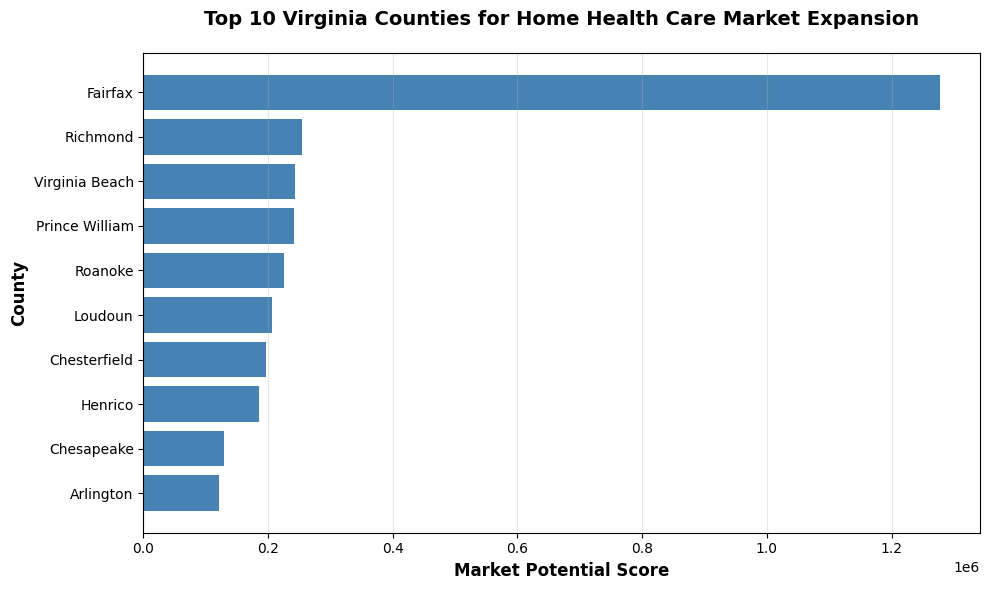

✅ Chart saved: top10_counties_chart.png


In [20]:
import matplotlib.pyplot as plt

# Top 10 counties bar chart
top10_counties = merged_data.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10_counties['county_name'], top10_counties['market_score'], color='steelblue')
plt.xlabel('Market Potential Score', fontsize=12, fontweight='bold')
plt.ylabel('County', fontsize=12, fontweight='bold')
plt.title('Top 10 Virginia Counties for Home Health Care Market Expansion',
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top10_counties_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart saved: top10_counties_chart.png")


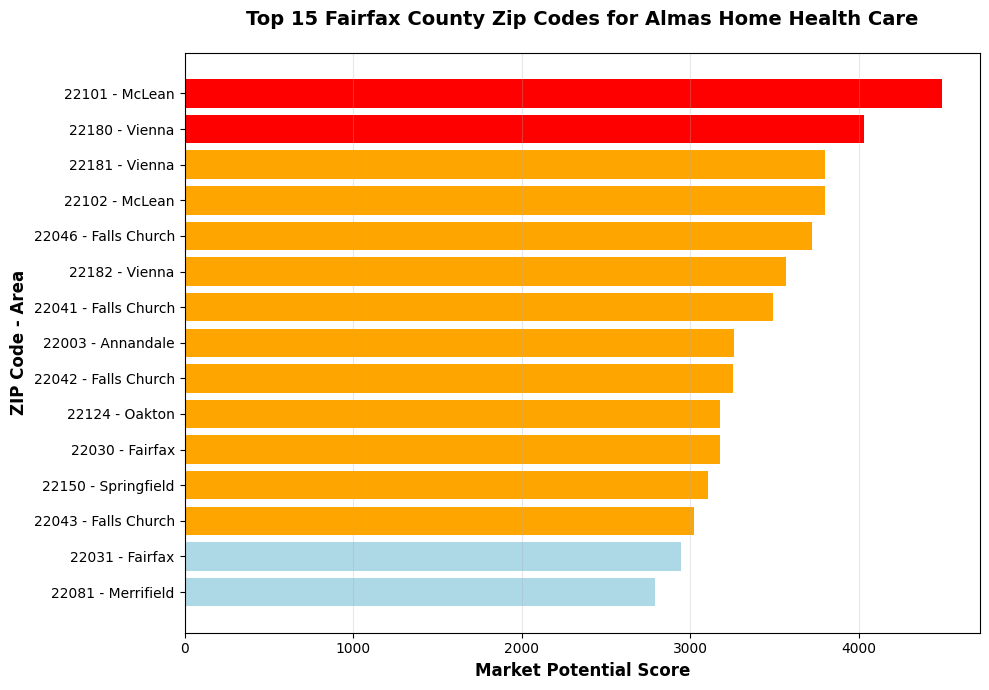

✅ Chart saved: top15_fairfax_zipcodes_chart.png


In [21]:
# Top 15 Fairfax County zip codes bar chart
top15_zips = fairfax_county_zips.head(15)

plt.figure(figsize=(10, 7))
colors = ['red' if x == 'Critical' else 'orange' if x == 'High' else 'lightblue'
          for x in top15_zips['priority_tier']]
plt.barh(top15_zips['zipcode'].astype(str) + ' - ' + top15_zips['city_area'],
         top15_zips['market_score'], color=colors)
plt.xlabel('Market Potential Score', fontsize=12, fontweight='bold')
plt.ylabel('ZIP Code - Area', fontsize=12, fontweight='bold')
plt.title('Top 15 Fairfax County Zip Codes for Almas Home Health Care',
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top15_fairfax_zipcodes_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart saved: top15_fairfax_zipcodes_chart.png")
